In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix


In [88]:
google_df = pd.read_csv(r'/Users/ladee/Downloads/GOOG.csv',sep=",",parse_dates=True,index_col=0)
google_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


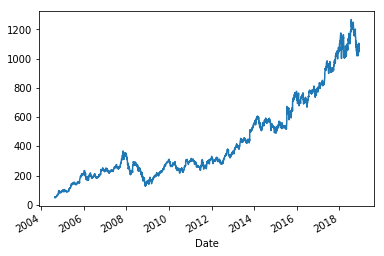

In [89]:
google_df['Close'].plot()

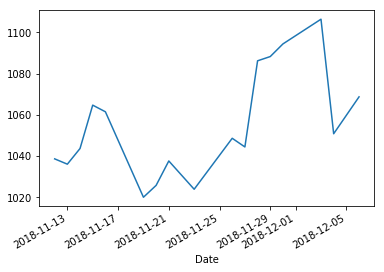

In [93]:
google_df['Close']['2018-11-10':].plot()

In [142]:
google_df['MA-9']=google_df.Close.rolling(9).mean().shift()
google_df['MA-100']=google_df.Close.rolling(100,center=True).mean()


In [143]:
google_df['MA-9'].head(12)

Date
2004-08-19          NaN
2004-08-20          NaN
2004-08-23          NaN
2004-08-24          NaN
2004-08-25          NaN
2004-08-26          NaN
2004-08-27          NaN
2004-08-30          NaN
2004-08-31          NaN
2004-09-01    52.291008
2004-09-02    52.286040
2004-09-03    51.910703
Name: MA-9, dtype: float64

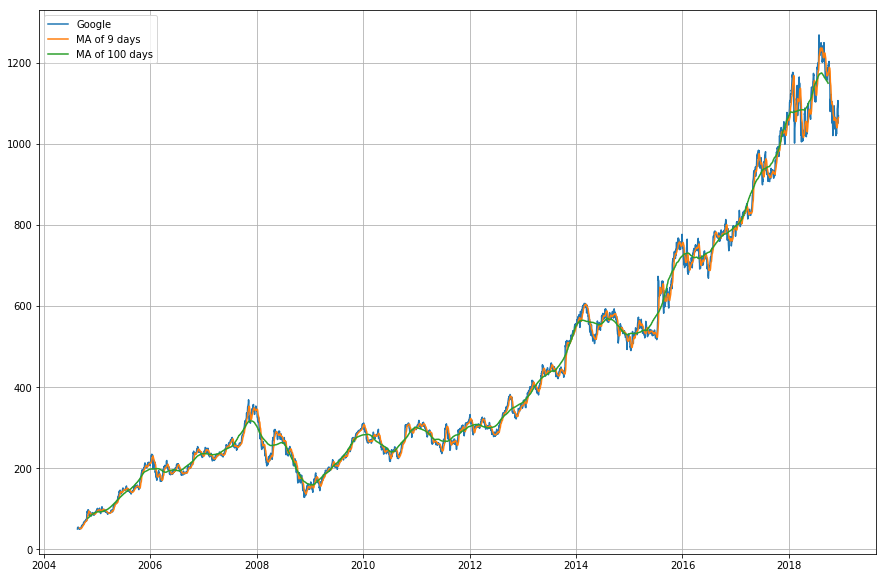

In [144]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(google_df['Close'],label='Google')
plt.plot(google_df['MA-9'],label='MA of 9 days')
plt.plot(google_df['MA-100'],label='MA of 100 days')
plt.legend(loc=2)

In [145]:
google_df.shape

(3601, 12)

# Compute log change (instantaneous rate of return)

In [146]:
google_df['change']=np.log(google_df['Close']/google_df['Close'].shift())

# Plot shows noisy data centered around 0

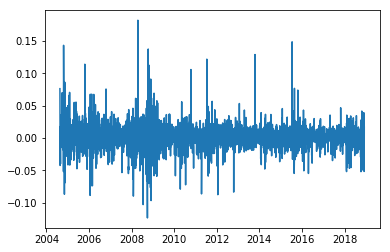

In [147]:
plt.plot(google_df.change)

# Computing moving average 

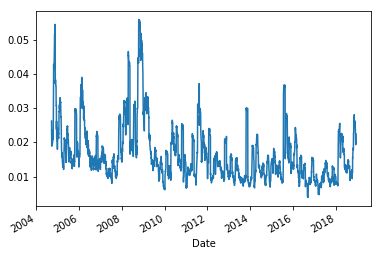

In [148]:
google_df['Volatility']=google_df.change.rolling(21).std().shift()
google_df['Volatility'].plot()

In [141]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3601 entries, 2004-08-19 to 2018-12-06
Data columns (total 12 columns):
Open          3601 non-null float64
High          3601 non-null float64
Low           3601 non-null float64
Close         3601 non-null float64
Adj Close     3601 non-null float64
Volume        3601 non-null int64
MA-9          3592 non-null float64
MA-20         3582 non-null float64
MA-100        3502 non-null float64
change        3600 non-null float64
Volatility    3579 non-null float64
MA-21         3581 non-null float64
dtypes: float64(11), int64(1)
memory usage: 525.7 KB


In [5]:
google_df.apply(lambda x: sum(x.isnull()),axis=0)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
google_df.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2018-11-21', '2018-11-23', '2018-11-26', '2018-11-27',
               '2018-11-28', '2018-11-29', '2018-11-30', '2018-12-03',
               '2018-12-04', '2018-12-06'],
              dtype='datetime64[ns]', name='Date', length=3601, freq=None)

In [9]:
google_df.loc[google_df['High']==1273.890015]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-27,1271.0,1273.890015,1231.0,1238.5,1238.5,2130600


In [13]:
google_df[google_df['High']==50.670437]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-07,50.178635,50.670437,49.483158,50.461796,50.461796,5891300


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115bd58d0>,
      dtype=object)

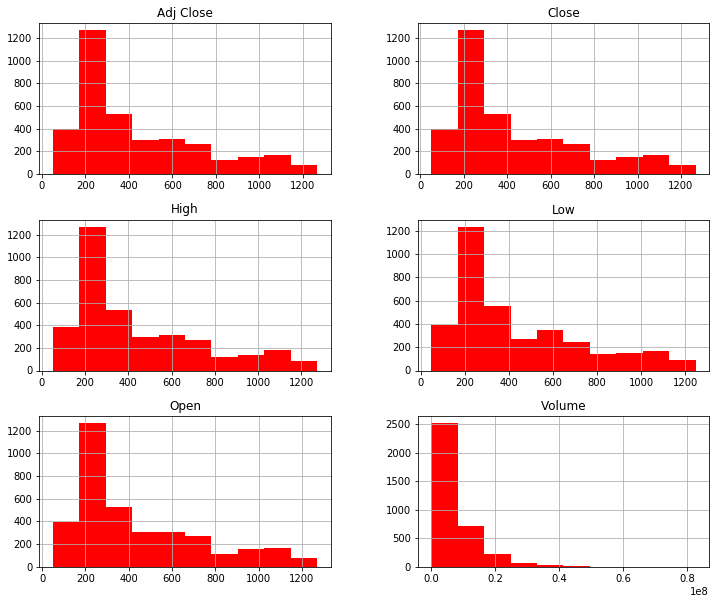

In [14]:
google_df.hist(figsize=(12,10), color='red')

In [15]:
google_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999898,0.999843,0.999738,0.999738,-0.547973
High,0.999898,1.000000,0.999824,0.999862,0.999862,-0.546265
Low,0.999843,0.999824,1.000000,0.999900,0.999900,-0.550521
Close,0.999738,0.999862,0.999900,1.000000,1.000000,-0.548527
Adj Close,0.999738,0.999862,0.999900,1.000000,1.000000,-0.548527
Volume,-0.547973,-0.546265,-0.550521,-0.548527,-0.548527,1.000000


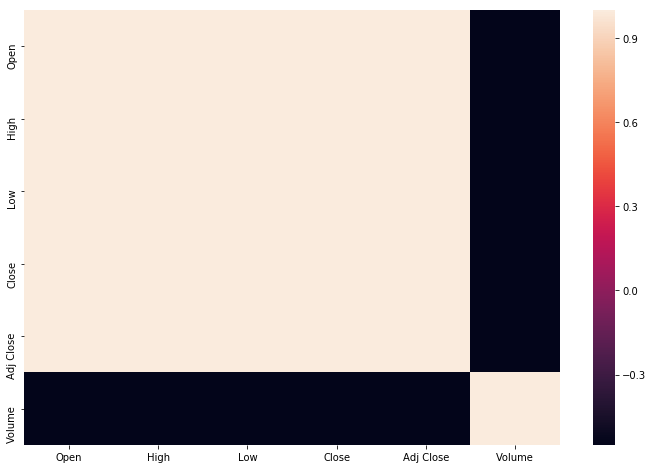

In [16]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(google_df.corr(), fmt="f",ax=ax)

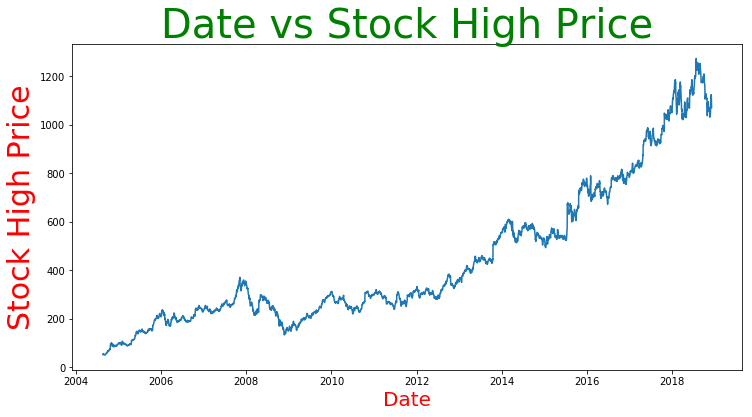

In [17]:
plt.figure(figsize=(12,6))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(google_df['High'])
plt.title("Date vs Stock High Price",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("Stock High Price",fontsize=30,color='r')
plt.show()


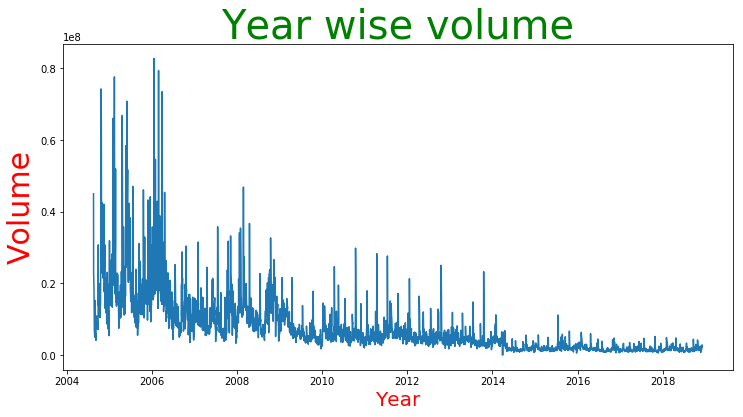

In [18]:
plt.figure(figsize=(12,6))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(google_df['Volume'])
plt.title("Year wise volume",fontsize=40,color='g')
plt.xlabel("Year",fontsize=20,color='r')
plt.ylabel("Volume",fontsize=30,color='r')
plt.show()

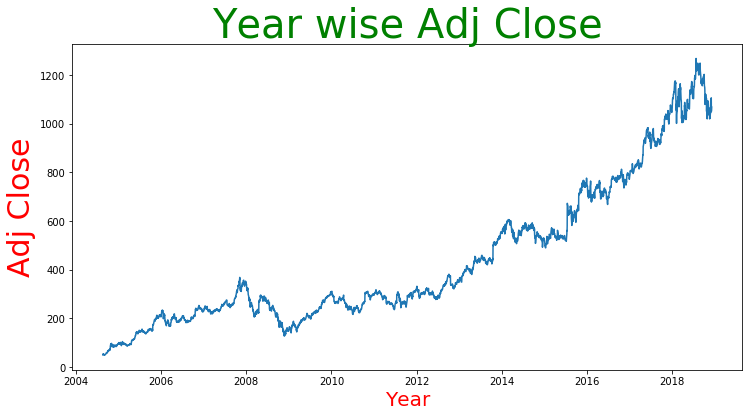

In [21]:
plt.figure(figsize=(12,6))
plt.plot(google_df['Adj Close'])
plt.title("Year wise Adj Close",fontsize=40,color='g')
plt.xlabel("Year",fontsize=20,color='r')
plt.ylabel("Adj Close",fontsize=30,color='r')
plt.show()

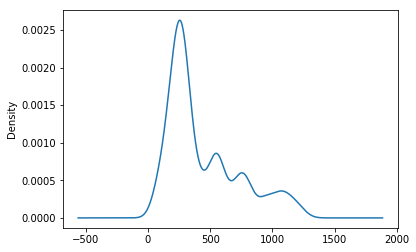

In [149]:
google_df['High'].plot("kde")

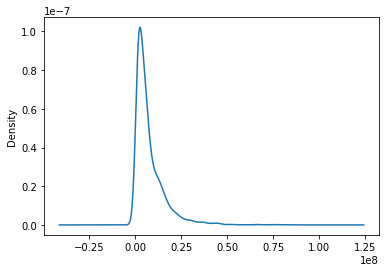

In [150]:
google_df['Volume'].plot("kde")

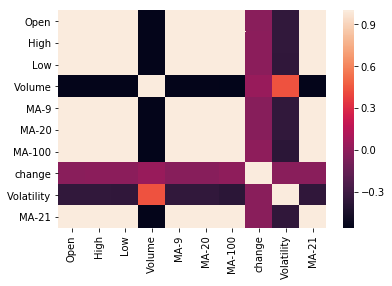

In [157]:
datax= google_df.drop(['Adj Close','Close'],axis=1)
sns.heatmap(datax.corr(), fmt="f")

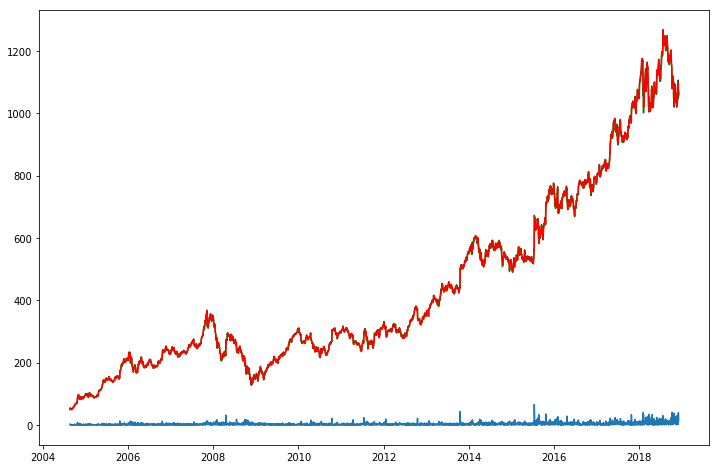

In [159]:
plt.figure(figsize=(12,8))

#gopen = data['Adj Close']
#ghigh = data['Forecast']
glow = google_df['Adj Close']
#plt.plot(gopen)
#plt.plot(ghigh,color='r')
plt.plot(glow,color='g')
plt.plot(glow.rolling(window=2).mean(),color='r')
plt.plot(glow.rolling(window=2).std())

# I have used Quandl, which offers a simple API for stock market data downloads. see below: 

In [1]:
import quandl
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate


In [2]:
df = quandl.get("WIKI/GOOGL")

In [211]:
print(df.tail())

               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1092.74  1106.30  1085.15  1090.88  1640709.0          0.0   
2018-03-22  1081.88  1082.90  1045.91  1049.08  2580374.0          0.0   
2018-03-23  1047.03  1063.36  1021.22  1021.57  2113497.0          0.0   
2018-03-26  1046.00  1055.63  1008.40  1053.21  2558385.0          0.0   
2018-03-27  1063.00  1064.84   996.92  1005.10  3029471.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1092.74    1106.30   1085.15     1090.88   
2018-03-22          1.0    1081.88    1082.90   1045.91     1049.08   
2018-03-23          1.0    1047.03    1063.36   1021.22     1021.57   
2018-03-26          1.0    1046.00    1055.63   1008.40     1053.21   
2018-03-27          1.0    1063.00    1064.84    996.92

In [212]:
df = df[['Adj. Close']]

In [213]:
forecast_out = int(30) # predicting 30 days into future
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out) #  label column with data shifted 30 units up

In [214]:
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [215]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

In [216]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [224]:
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9332933227279867


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


# Forecasting the adjusted close values of Google (30 Days)

In [225]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[1075.80647595 1093.72561718 1113.90501373 1119.2807561  1127.07965506
 1136.12067632 1131.32526978 1151.85083155 1169.11836765 1143.19670084
 1129.39081703 1093.54235324 1103.11280367 1115.34058129 1119.54547068
 1134.38985018 1151.04650646 1185.70375462 1190.24462791 1163.43718537
 1174.96245121 1175.05408318 1160.95294079 1124.39178388 1122.2435232
 1115.28967464 1072.73171421 1044.72287471 1076.9366036  1027.95422379]
